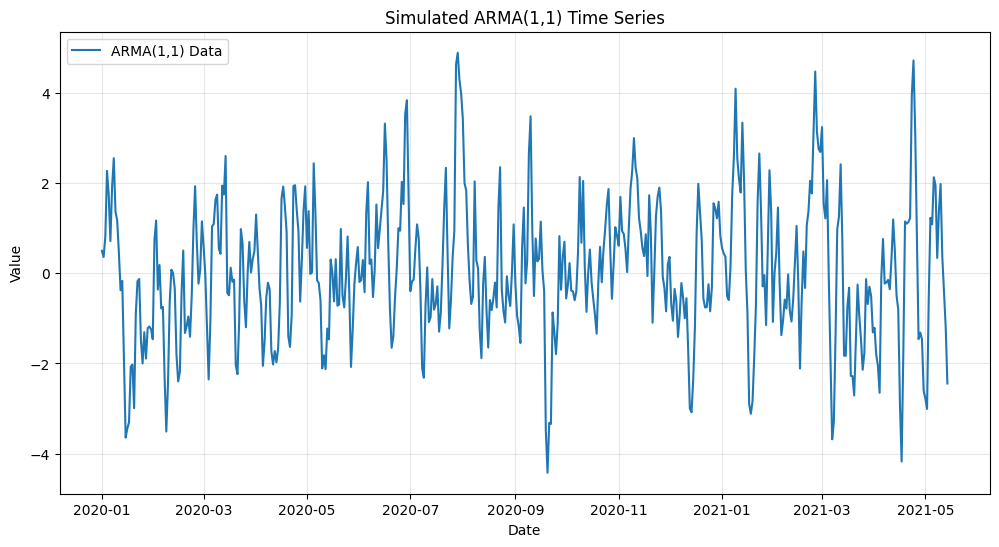

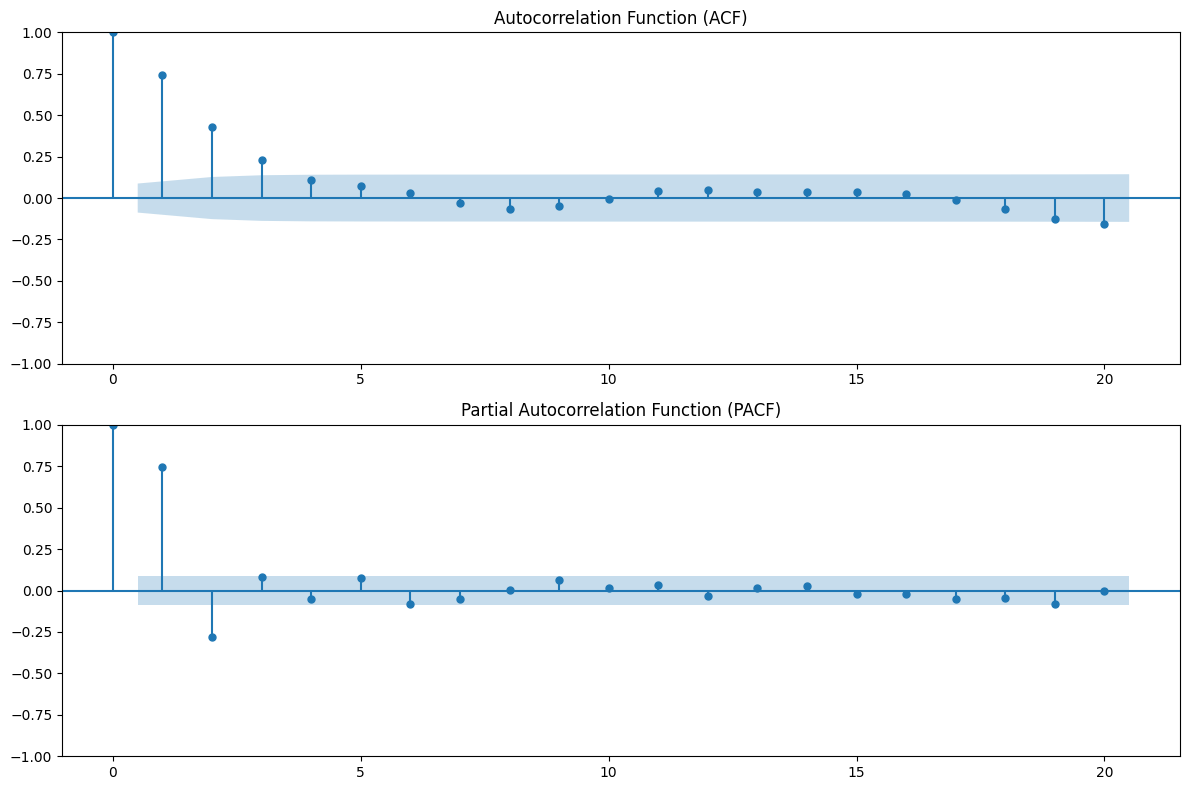

                               SARIMAX Results                                
Dep. Variable:              ARMA(1,1)   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -699.792
Date:                Mon, 14 Apr 2025   AIC                           1407.585
Time:                        14:27:21   BIC                           1424.443
Sample:                    01-01-2020   HQIC                          1414.200
                         - 05-14-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0262      0.148      0.177      0.860      -0.264       0.317
ar.L1          0.5753      0.047     12.248      0.000       0.483       0.667
ma.L1          0.4225      0.052      8.070      0.0

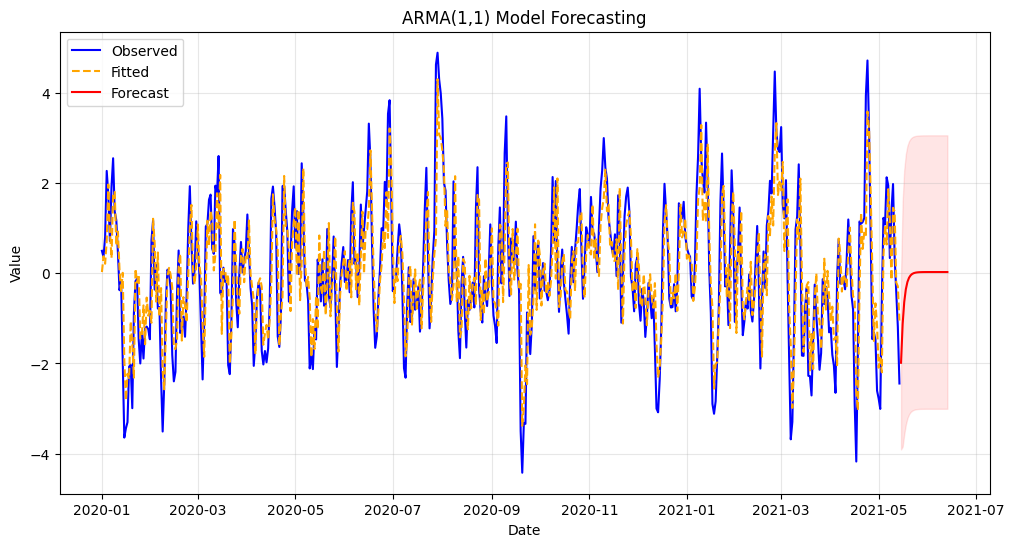

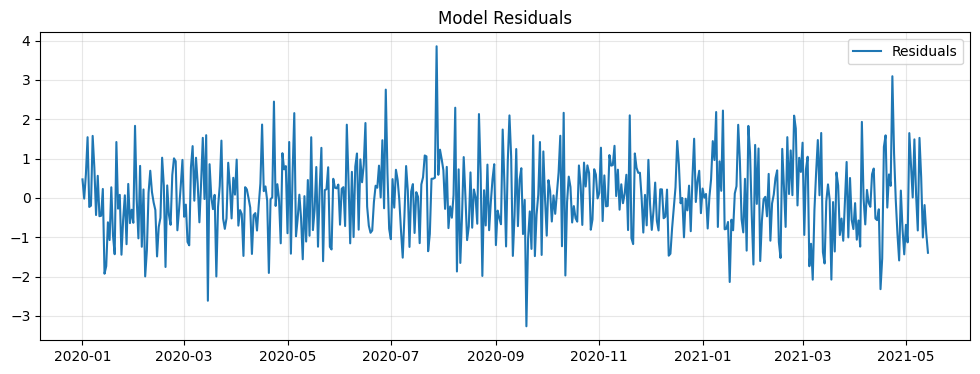

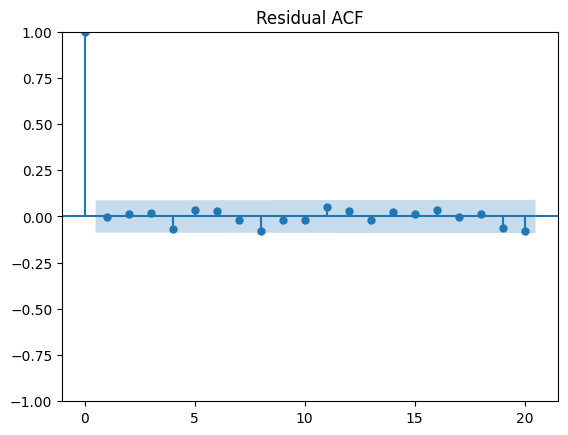

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ----------------------------
# 1. 生成 ARMA(1,1) 模拟数据
# ----------------------------
np.random.seed(42)  # 固定随机种子
n = 500   # 数据点数量
ar = 0.6  # AR(1) 系数
ma = 0.4  # MA(1) 系数

# 生成白噪声序列
epsilon = np.random.normal(0, 1, n + 1)

# 生成 ARMA(1,1) 序列
data = np.zeros(n)
data[0] = epsilon[0]  # 初始值
for t in range(1, n):
    data[t] = ar * data[t-1] + ma * epsilon[t-1] + epsilon[t]

# 转换为 Pandas Series 并添加时间索引
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
ts = pd.Series(data, index=dates, name='ARMA(1,1)')

# ----------------------------
# 2. 绘制原始时间序列
# ----------------------------
plt.figure(figsize=(12, 6))
plt.plot(ts, label='ARMA(1,1) Data')
plt.title("Simulated ARMA(1,1) Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# ----------------------------
# 3. 绘制 ACF 和 PACF
# ----------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts, lags=20, ax=ax1, title="Autocorrelation Function (ACF)")
plot_pacf(ts, lags=20, ax=ax2, title="Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

# ----------------------------
# 4. 拟合 ARMA(1,1) 模型
# ----------------------------
model = ARIMA(ts, order=(1, 0, 1))  # ARMA(1,1) = ARIMA(1,0,1)
results = model.fit()

# 输出模型摘要
print(results.summary())

# ----------------------------
# 5. 预测未来值
# ----------------------------
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# ----------------------------
# 6. 绘制预测结果
# ----------------------------
plt.figure(figsize=(12, 6))

# 原始数据
plt.plot(ts.index, ts, label='Observed', color='blue')

# 拟合值（样本内预测）
fitted_values = results.fittedvalues
plt.plot(fitted_values.index, fitted_values, label='Fitted', color='orange', linestyle='--')

# 预测值
forecast_index = pd.date_range(start=ts.index[-1], periods=forecast_steps+1, freq='D')[1:]
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='red', alpha=0.1)

# 图形装饰
plt.title("ARMA(1,1) Model Forecasting")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ----------------------------
# 7. 残差诊断（附加）
# ----------------------------
residuals = results.resid

# 绘制残差序列
plt.figure(figsize=(12, 4))
plt.plot(residuals, label='Residuals')
plt.title("Model Residuals")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# 残差ACF
plot_acf(residuals, lags=20, title="Residual ACF")
plt.show()

The AR and MA models are special cases of the ARMA(p,q) model. We require that there are no common factors between the AR and MA polynomials; otherwise the order (p,q) of the model can be reduced.